In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import cholesky, solve_triangular, cho_factor, cho_solve
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.metrics import pairwise_distances

In [2]:
X, t = make_moons(n_samples=100, noise=0.1, random_state=0)
N = X.shape[0]

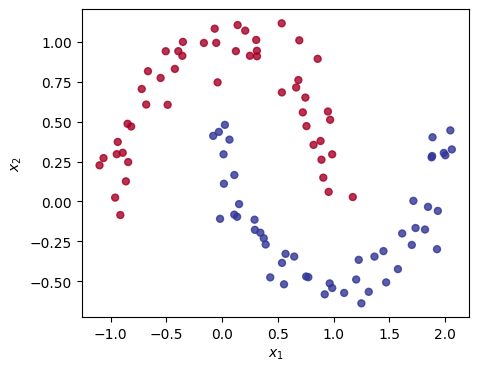

In [24]:
fig = plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=t, cmap=matplotlib.cm.RdYlBu, s=25, alpha=0.8)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.savefig('fig.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

In [4]:
def kernel(xa, xb, amp=2.0, ll=0.5):
    D = pairwise_distances(xa, xb)
    return amp**2 * np.exp(-0.5 * 1./ll**2 * D**2 )

def sigmoid(f):
    return 1.0 / (1.0 + np.exp(-f)) + 1e-8

In [5]:
M = 20
xx = np.linspace(-1.3, 2.3, M)
yy = np.linspace(-1.3, 1.3, M)
Xa, Xb = np.meshgrid(xx, yy)
pts = np.hstack([Xa.reshape(M*M,1), Xb.reshape(M*M,1)])

In [6]:
prior = multivariate_normal(np.zeros((M*M)), kernel(pts,pts), allow_singular=True)\
norm = matplotlib.cm.colors.Normalize(vmax=1, vmin=0)

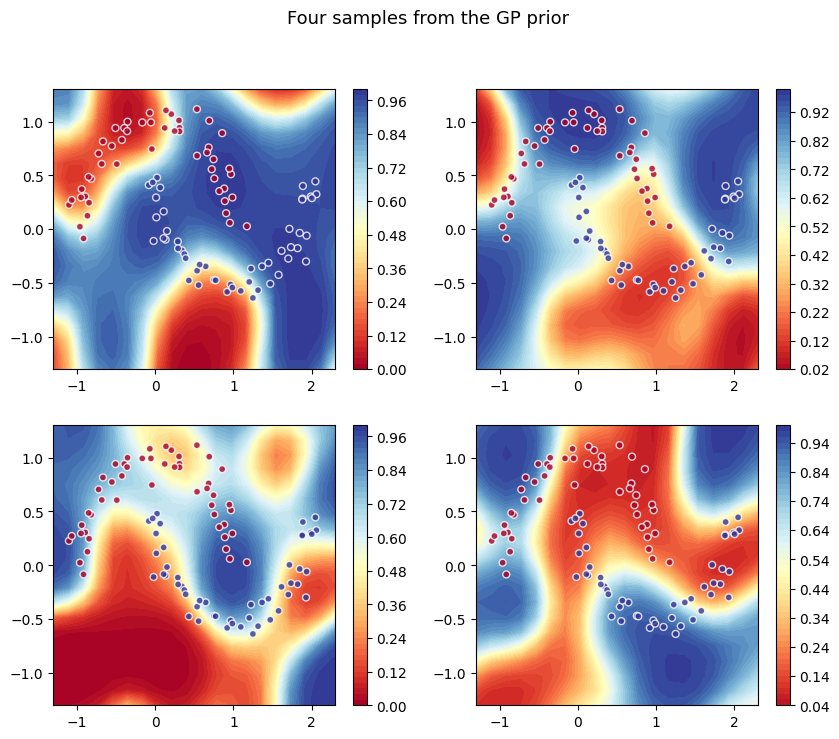

In [25]:
fig = plt.figure(figsize=(10,8))
plt.subplot(221)
c = plt.contourf(Xa, Xb, sigmoid(prior.rvs(1)).reshape(M,M), 50, vmin=0, vmax=1, cmap=matplotlib.cm.RdYlBu, norm=norm)
plt.scatter(X[:,0], X[:,1], c=t, cmap=matplotlib.cm.RdYlBu, s=25, edgecolor='w', alpha=0.8, norm=norm)
cbar = plt.colorbar(c)

plt.subplot(222)
c = plt.contourf(Xa, Xb, sigmoid(prior.rvs(1)).reshape(M,M), 50, vmin=0, vmax=1, cmap=matplotlib.cm.RdYlBu, norm=norm)
plt.scatter(X[:,0], X[:,1], c=t, cmap=matplotlib.cm.RdYlBu, s=25, edgecolor='w', alpha=0.8, norm=norm)
cbar = plt.colorbar(c)

plt.subplot(223)
c = plt.contourf(Xa, Xb, sigmoid(prior.rvs(1)).reshape(M,M), 50, vmin=0, vmax=1, cmap=matplotlib.cm.RdYlBu, norm=norm)
plt.scatter(X[:,0], X[:,1], c=t, cmap=matplotlib.cm.RdYlBu, s=25, edgecolor='w', alpha=0.8, norm=norm)
cbar = plt.colorbar(c)

plt.subplot(224)
c = plt.contourf(Xa, Xb, sigmoid(prior.rvs(1)).reshape(M,M), 50, vmin=0, vmax=1, cmap=matplotlib.cm.RdYlBu, norm=norm)
plt.scatter(X[:,0], X[:,1], c=t, cmap=matplotlib.cm.RdYlBu, s=25, edgecolor='w', alpha=0.8, norm=norm)
cbar = plt.colorbar(c)

fig.suptitle('Four samples from the GP prior', fontsize=13)
plt.savefig('fig2.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

In [8]:
f = np.random.rand(N,1)
K = kernel(X,X)
K_inv = np.linalg.inv(K + 1e-5 * np.eye(N))

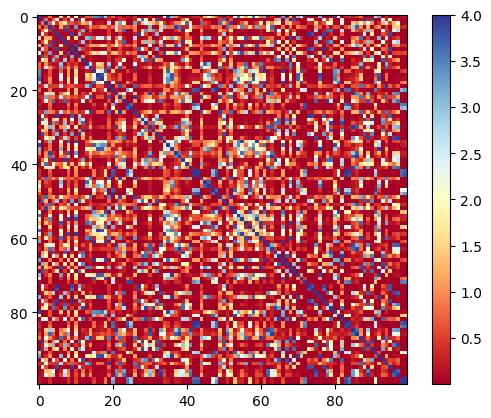

In [9]:
c = plt.imshow(K, cmap=matplotlib.cm.RdYlBu)
plt.colorbar(c)

In [10]:
for j in range(0, 10):
    pp = sigmoid(f).flatten()
    g_f = np.sum(t * np.log(pp) + (1 - t) * np.log(1. - pp + 1e-8)) - 0.5 * f.T @ K_inv @ f
    print(float(g_f))
    q = (t - pp).reshape(N,1)
    grad = q - K_inv @ f
    P = np.diag(pp * (1. - pp))
    hess = -P - K_inv
    f_prime = f - np.linalg.inv(hess + 1e-12 * np.eye(N)) @ grad
    f = f_prime

-172370.77223793537
-19.282854330238436
-16.478057199339062
-16.338477505385345
-16.33785884403903
-16.337858825403753
-16.33785882444115
-16.337858825450375
-16.337858825363156
-16.33785882566754


/var/folders/34/0177579s72zfk8k1ytk34_9c0346k7/T/ipykernel_40819/2525650791.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(float(g_f))


In [11]:
Kxpx = kernel(pts, X)
Kxpxp = kernel(pts, pts)
mean = Kxpx @ K_inv @ f
cov = Kxpxp - Kxpx @ K_inv @ Kxpx.T

posterior = multivariate_normal(mean.flatten(), cov, allow_singular=True)

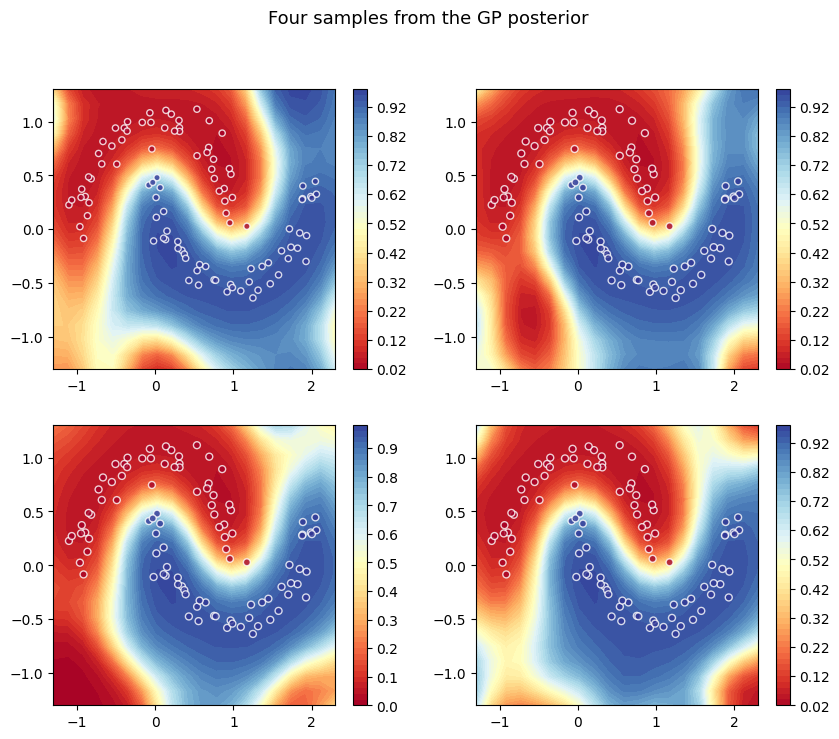

In [26]:
fig = plt.figure(figsize=(10,8))
plt.subplot(221)
c = plt.contourf(Xa, Xb, sigmoid(posterior.rvs(1)).reshape(M,M), 50, vmin=0, vmax=1, cmap=matplotlib.cm.RdYlBu, norm=norm)
plt.scatter(X[:,0], X[:,1], c=t, cmap=matplotlib.cm.RdYlBu, s=20, edgecolor='w', alpha=0.8, norm=norm)
cbar = plt.colorbar(c)

plt.subplot(222)
c = plt.contourf(Xa, Xb, sigmoid(posterior.rvs(1)).reshape(M,M), 50, vmin=0, vmax=1, cmap=matplotlib.cm.RdYlBu, norm=norm)
plt.scatter(X[:,0], X[:,1], c=t, cmap=matplotlib.cm.RdYlBu, s=25, edgecolor='w', alpha=0.8, norm=norm)
cbar = plt.colorbar(c)

plt.subplot(223)
c = plt.contourf(Xa, Xb, sigmoid(posterior.rvs(1)).reshape(M,M), 50, vmin=0, vmax=1, cmap=matplotlib.cm.RdYlBu, norm=norm)
plt.scatter(X[:,0], X[:,1], c=t, cmap=matplotlib.cm.RdYlBu, s=25, edgecolor='w', alpha=0.8, norm=norm)
cbar = plt.colorbar(c)

plt.subplot(224)
c = plt.contourf(Xa, Xb, sigmoid(posterior.rvs(1)).reshape(M,M), 50, vmin=0, vmax=1, cmap=matplotlib.cm.RdYlBu, norm=norm)
plt.scatter(X[:,0], X[:,1], c=t, cmap=matplotlib.cm.RdYlBu,s=25, edgecolor='w', alpha=0.8,norm=norm)
cbar = plt.colorbar(c)

fig.suptitle('Four samples from the GP posterior', fontsize=13)
plt.savefig('fig3.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()